In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/indian-food-101/indian_food.csv


In [8]:
import pandas as pd #for handling data
import numpy as np #for numerical computations
import matplotlib.pyplot as plt #for visualization
import seaborn as sns #advanced plotting

%matplotlib inline

In [6]:
df = pd.read_csv("/kaggle/input/indian-food-101/indian_food.csv")
df.head() #displaying some of the rows

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East


In [7]:
df.info() #information about dataset\
df.isnull().sum() #missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            255 non-null    object
 1   ingredients     255 non-null    object
 2   diet            255 non-null    object
 3   prep_time       255 non-null    int64 
 4   cook_time       255 non-null    int64 
 5   flavor_profile  255 non-null    object
 6   course          255 non-null    object
 7   state           255 non-null    object
 8   region          254 non-null    object
dtypes: int64(2), object(7)
memory usage: 18.1+ KB


name              0
ingredients       0
diet              0
prep_time         0
cook_time         0
flavor_profile    0
course            0
state             0
region            1
dtype: int64

In [9]:
#handling missing value
df["region"].fillna(df["region"].mode()[0], inplace=True)



<ipython-input-9-142a8561efcb>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["region"].fillna(df["region"].mode()[0], inplace=True)


In [10]:
#Univariate Analysis
df.describe() #numerical analysis

,prep_time,cook_time
count,255.000000,255.000000
mean,31.105882,34.529412
std,72.554409,48.265650
min,-1.000000,-1.000000
25%,10.000000,20.000000
50%,10.000000,30.000000
75%,20.000000,40.000000
max,500.000000,720.000000


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


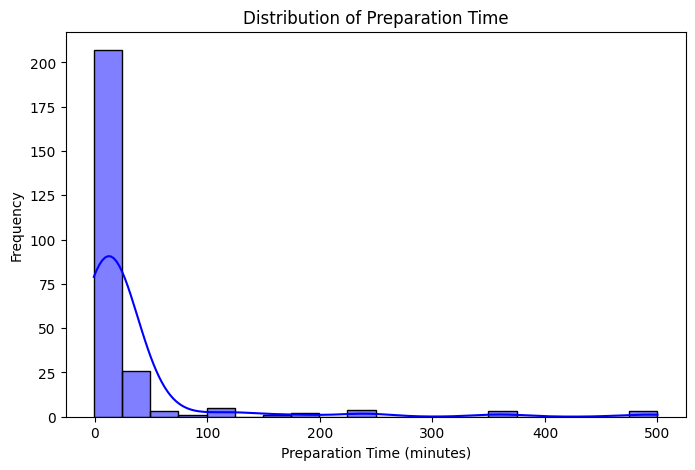

In [12]:
#Univariate analysis
#Histogram for prep_time
plt.figure(figsize=(8,5))
sns.histplot(df["prep_time"], bins=20, kde=True, color="blue")
plt.title("Distribution of Preparation Time")
plt.xlabel("Preparation Time (minutes)")
plt.ylabel("Frequency")
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


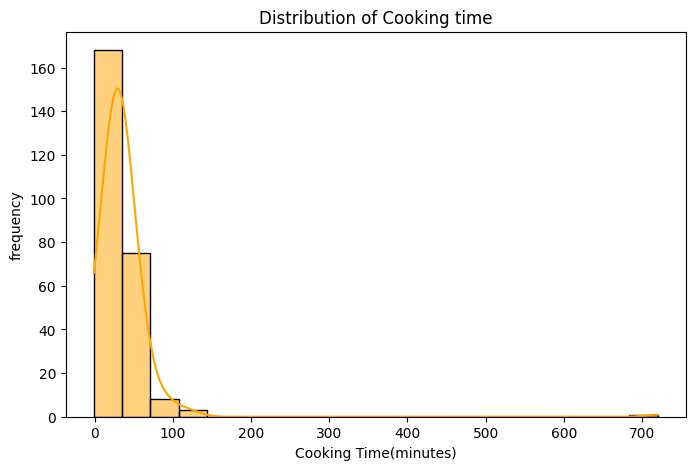

In [29]:
#Univariate Analysis
#Histogram for cook_time
plt.figure(figsize=(8,5))
sns.histplot(df['cook_time'],bins=20,kde='True', color='orange')
plt.title('Distribution of Cooking time')
plt.xlabel('Cooking Time(minutes)')
plt.ylabel('frequency')
plt.show()

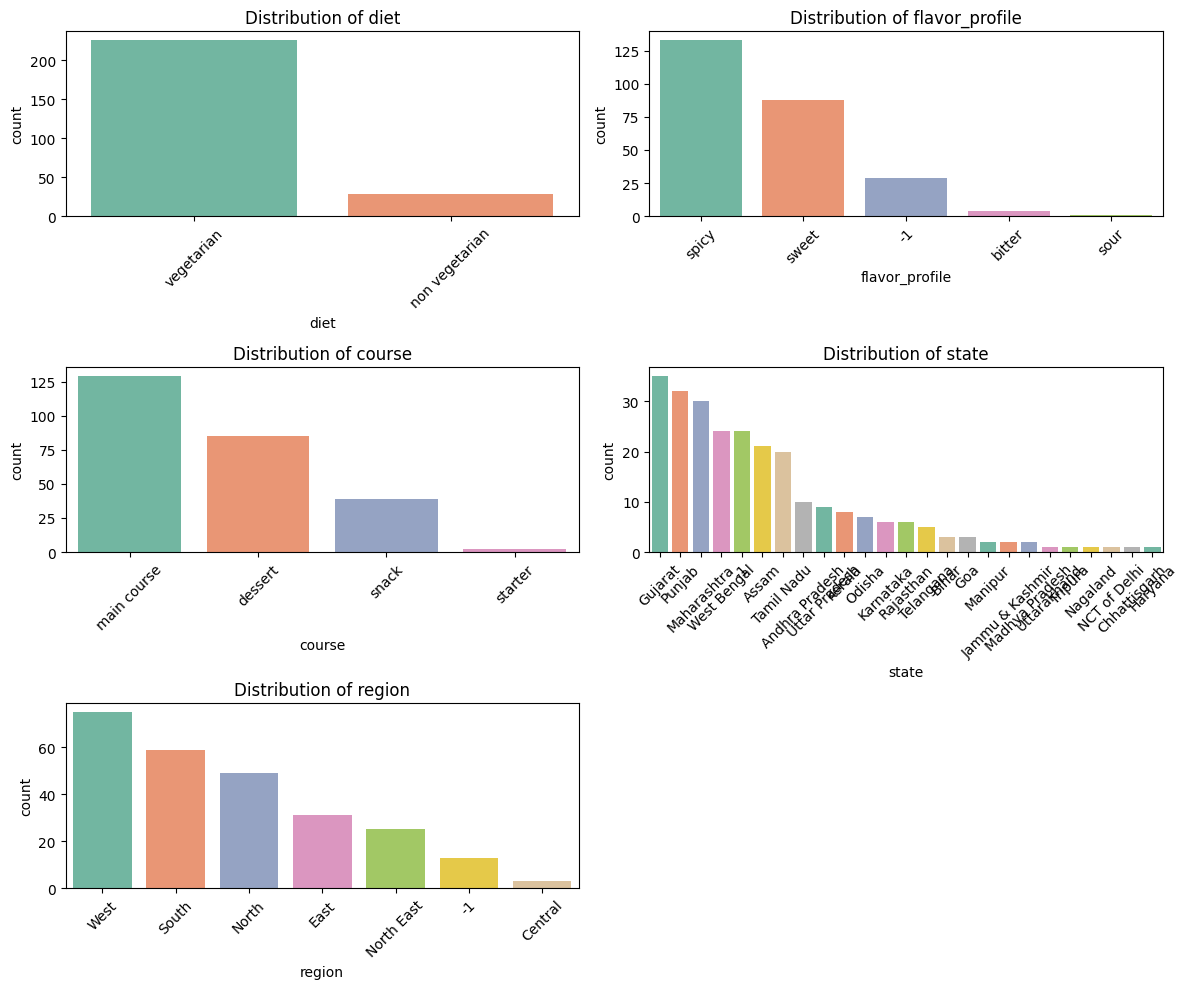

In [18]:
# Countplots for categorical variables
categorical_columns = ["diet", "flavor_profile", "course", "state", "region"]

plt.figure(figsize=(12,10))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(3, 2, i)
    sns.countplot(x=df[col], palette="Set2", order=df[col].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

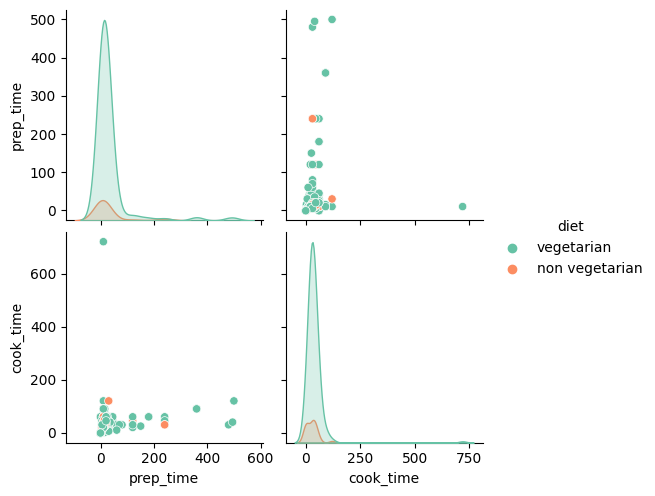

In [22]:
#Multivariate Analysis

sns.pairplot(df, vars=["prep_time", "cook_time"], hue="diet", palette="Set2")
plt.show()

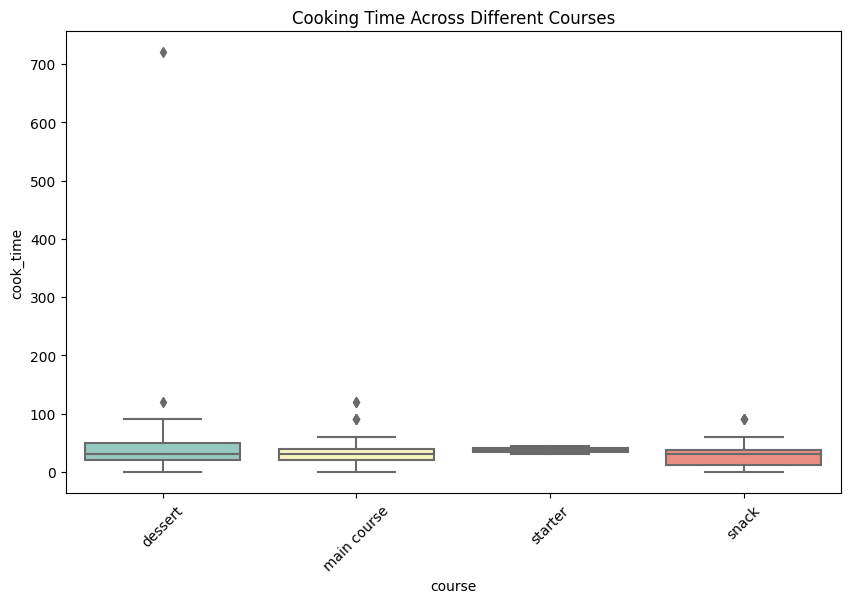

In [23]:
#Boxplot
plt.figure(figsize=(10,6))
sns.boxplot(x="course", y="cook_time", data=df, palette="Set3")
plt.xticks(rotation=45)
plt.title("Cooking Time Across Different Courses")
plt.show()

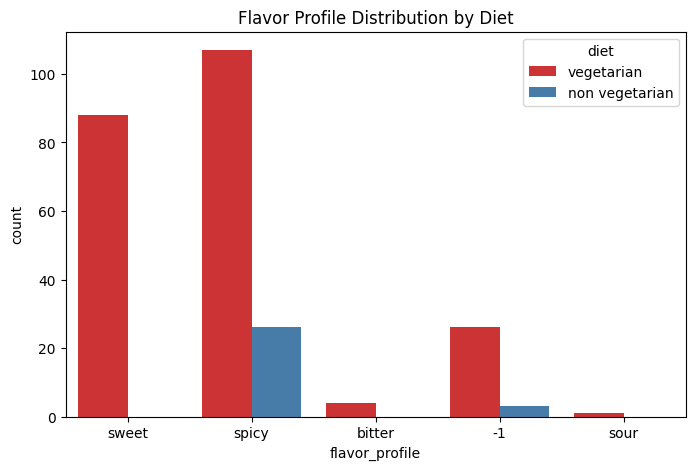

In [24]:
plt.figure(figsize=(8,5))
sns.countplot(x="flavor_profile", hue="diet", data=df, palette="Set1")
plt.title("Flavor Profile Distribution by Diet")
plt.show()

In [28]:
#Some Conclusions after Univariate and Multivariate Analysis
The average preparation time is lower than cooking time for most dishes.
Dishes with longer prep times generally have longer cooking times. 
Vegetarian and Non-Vegetarian dishes have different cooking trends.
Certain states and regions have unique food preferences, influencing prep and cook times.

